**Unsupervised_Learning_Project: Team JB3**

### **Building an Anime Recommendation System**

<div align="center" style="font-size: 40%; text-align: center; margin: 0 auto">
    <img src="https://mcdn.wallpapersafari.com/medium/67/98/JKSuGa.jpg" style="display: block; margin-left: auto; margin-right: auto; width: 800px; height: 200px;" />
</div>


### **Project Overview**

**Introduction**

Anime has become a global phenomenon, captivating audiences with its unique storytelling, diverse genres, and vibrant characters. With an ever-growing collection of anime titles available, it can be challenging for viewers to discover new series that align with their tastes.
- This project aims to solve this problem by developing a robust anime recommendation system that leverages both collaborative filtering and content-based filtering techniques to accurately predict how a user will rate an anime title they have not yet viewed.

**Objective**

The primary objective of this project is to create an end-to-end recommendation system capable of providing personalized anime recommendations to users. This involves:

- **Data Loading and Preprocessing**: Cleaning and preparing the datasets for analysis.
- **Collaborative Filtering Model**: Using user ratings to recommend anime titles.
- **Content-Based Filtering Model**: Utilizing anime metadata to find similar titles.
- **Hybrid Recommender System**: Combining collaborative and content-based models for enhanced accuracy.
- **Model Evaluation**: Assessing the performance of the models using relevant metrics.
- **Deployment**: Deploying the recommendation system as a web application for easy user access.

### **Loading Packages**

In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Data Loading**

**Data Sources**

The project uses three primary datasets:

- **anime.csv**: Contains information about anime titles, including genres, type, number of episodes, average rating, and number of members.
- **train.csv**:This file contains rating data, supplied by individual users for individual anime titles. It contains user_id information, the anime_id of the title watched, and the rating given (if applicable).
- **test.csv**: This file will be used to create the final submission. It contains a user_id and an anime_id column only - no rating (that's your task!). These ids will be used to create the rating predictions.

In [2]:
anime_df = pd.read_csv('anime.csv')
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,user_id,anime_id,rating
0,1,11617.0,10.0
1,1,11757.0,10.0
2,1,15451.0,10.0
3,2,11771.0,10.0
4,3,20.0,8.0


In [4]:
test_df = pd.read_csv('test.csv')
test_df.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


### **Initial Data Inspection**

Initial data inspection is a crucial step in any data science project.
- It helps understand the structure, quality, and characteristics of the data before you proceed with any analysis or modeling.
- Here are the key steps and techniques involved in an initial data inspection:


***View the Data Structure***

- Use df.shape to get the number of rows and columns.
- Use df.head() and df.tail() to inspect the first and last few rows.


**Anime dataset**

In [ ]:
# Display the first few rows of the dataframe
anime_df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
# Getting the shape of the DataFrame
anime_df.shape

(12294, 7)

In [ ]:
# Display basic information about the dataframe
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


**Analysis**

It looks like the DataFrame anime_df has 12,294 rows and 7 columns. This indicates a fairly large dataset, possibly containing information about various anime series or movies

**Train and Test datasets**

In [ ]:
train_df.head()

,user_id,anime_id,rating
0,1,11617.0,10.0
1,1,11757.0,10.0
2,1,15451.0,10.0
3,2,11771.0,10.0
4,3,20.0,8.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174672 entries, 0 to 174671
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   174672 non-null  int64  
 1   anime_id  174671 non-null  float64
 2   rating    174671 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 4.0 MB


In [ ]:
test_df.head()

,user_id,anime_id
0,40763,21405.0
1,68791,10504.0
2,40487,1281.0
3,55290,165.0
4,72323,11111.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191644 entries, 0 to 191643
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   191644 non-null  int64  
 1   anime_id  191643 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.9 MB


***Making Copies of the Datasets***
- Making copies of datasets can be important to ensure the original data remains unchanged during various preprocessing steps, analysis, or experimentation.
- In Python, especially when using pandas, this can be done using the .copy() method.

In [5]:
anime_df_copy = anime_df.copy()
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

###**Data Cleaning**

***Anime Dataset***

In [6]:
# 1. Handle missing values
# Check for missing values
missing_values = anime_df_copy.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [7]:
# Fill missing values in 'genre' and 'type' with 'Unknown'
anime_df_copy['genre'].fillna('Unknown', inplace=True)
anime_df_copy['type'].fillna('Unknown', inplace=True)

# Fill missing values in 'rating' with the mean
anime_df_copy['rating'].fillna(anime_df['rating'].mean(), inplace=True)


In [8]:
# 2. Normalize text data
# Strip leading/trailing whitespace from text columns
anime_df_copy['name'] = anime_df_copy['name'].str.strip()
anime_df_copy['genre'] = anime_df_copy['genre'].str.strip()
anime_df_copy['type'] = anime_df_copy['type'].str.strip()

In [9]:
# 3. Convert data types
# Convert 'episodes' column to numeric, coerce errors to handle non-numeric values
anime_df_copy['episodes'] = pd.to_numeric(anime_df_copy['episodes'], errors='coerce')

In [10]:
# Convert 'rating' and 'members' columns to numeric
anime_df_copy['rating'] = pd.to_numeric(anime_df_copy['rating'], errors='coerce')
anime_df_copy['members'] = pd.to_numeric(anime_df_copy['members'], errors='coerce')


In [11]:
# 4. Remove duplicates
anime_df_cleaned = anime_df_copy.drop_duplicates()

In [12]:
# Display the cleaned dataframe
anime_df_cleaned.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


***Train & Test Dataset***

In an unsupervised learning project, having separate training and test datasets is essential for several reasons:

Model Training and Evaluation:

- Training Data: Used to train the model. The model learns patterns and relationships from this data.
- Test Data: Used to evaluate the model's performance on unseen data. This helps assess how well the model generalizes to new, unseen examples.

Avoiding Overfitting:

- By training on one dataset and testing on another, you ensure the model isn't just memorizing the training data (overfitting) but is actually learning to generalize from the patterns in the data.


**Train Dataset**

In [14]:
# Clean and preprocess the train_df dataframe
# Check for missing values
missing_values_train = train_df_copy.isnull().sum()
print("Missing values in each column:\n", missing_values_train)


Missing values in each column:
 user_id     0
anime_id    1
rating      1
dtype: int64


In [15]:
# Fill missing values in 'rating' with the mean
train_df_copy['rating'].fillna(train_df_copy['rating'].mean(), inplace=False)

train_df_copy.head()


,user_id,anime_id,rating
0,1,11617.0,10.0
1,1,11757.0,10.0
2,1,15451.0,10.0
3,2,11771.0,10.0
4,3,20.0,8.0


In [16]:
# Convert 'user_id', 'anime_id', and 'rating' to numeric
train_df_copy['user_id'] = pd.to_numeric(train_df_copy['user_id'], errors='coerce')
train_df_copy['anime_id'] = pd.to_numeric(train_df_copy['anime_id'], errors='coerce')
train_df_copy['rating'] = pd.to_numeric(train_df_copy['rating'], errors='coerce')

In [17]:
# Remove duplicates
train_df_cleaned = train_df_copy.drop_duplicates()

In [18]:
# Display the cleaned ratings dataframe
train_df_cleaned.head()
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171907 entries, 0 to 1171906
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user_id   1171907 non-null  int64  
 1   anime_id  1171906 non-null  float64
 2   rating    1171906 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 26.8 MB


**Test Dataset**

In [19]:
# Clean and preprocess the test_df dataframe
# Check for missing values
missing_values_test = test_df_copy.isnull().sum()
print("Missing values in each column:\n", missing_values_train)


Missing values in each column:
 user_id     0
anime_id    1
rating      1
dtype: int64


In [20]:
# Remove duplicates
test_df_cleaned = test_df_copy.drop_duplicates()

In [21]:
# Convert 'user_id', 'anime_id', and 'rating' to numeric
test_df_cleaned['user_id'] = pd.to_numeric(test_df_cleaned['user_id'], errors='coerce')
test_df_cleaned['anime_id'] = pd.to_numeric(test_df_cleaned['anime_id'], errors='coerce')


In [22]:
# Display the cleaned ratings dataframe
test_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB


***Cleaned Datasets***

- Saving data to a CSV file provides a permanent record of the cleaned data.
-This is useful for reproducibility and documentation, allowing you to preserve the state of the data at a particular point in time.
- Saving these files ensures that the cleaned and processed data is preserved, portable, and ready for the next steps in your analysis or modeling pipeline.


In [23]:
import pandas as pd
from google.colab import files

# Assuming anime_df_cleaned, train_df_cleaned, and test_df_cleaned are already defined and cleaned

# Save the cleaned anime DataFrame to a CSV file
anime_df_cleaned.to_csv('/content/anime_cleaned.csv', index=False)

# Save the cleaned train DataFrame to a CSV file
train_df_cleaned.to_csv('/content/train_cleaned.csv', index=False)

# Save the cleaned test DataFrame to a CSV file
test_df_cleaned.to_csv('/content/test_cleaned.csv', index=False)

# Download the files
files.download('/content/anime_cleaned.csv')
files.download('/content/train_cleaned.csv')
files.download('/content/test_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Explanation**

This code will save the cleaned DataFrames to CSV files in the Colab environment and then trigger downloads for each file. You can run the cell, and the files should start downloading to your local machine automatically
- **anime_cleaned.csv**: This file contains the cleaned anime dataset, which can be used for further analysis or as input to machine learning models.
- **train_cleaned.csv**: This file contains the cleaned training dataset, essential for training machine learning models.
- **test_cleaned.csv**: This file contains the cleaned test dataset, used for evaluating the performance of machine learning models.

### **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a crucial initial step in any data analysis or data science project. Its primary goal is to understand the data, uncover patterns, spot anomalies, and check assumptions using summary statistics and visualizations.

In [ ]:
import pandas as pd

# Assuming anime is your DataFrame
# Example DataFrame for demonstration purposes
anime = pd.DataFrame({
    'score': [8.5, 9.2, 7.8, 8.1, 6.5],
    'episodes': [12, 24, 26, 13, 52]
})

# Use describe() to get summary statistics, then format the numeric values
summary_stats = anime.describe().applymap('{0:.2f}'.format)

print(summary_stats)


      score episodes
count  5.00     5.00
mean   8.02    25.40
std    1.00    16.15
min    6.50    12.00
25%    7.80    13.00
50%    8.10    24.00
75%    8.50    26.00
max    9.20    52.00


Purpose: Generate summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for numeric data (score and episodes) in the anime dataset.
Method: Uses describe() on a pandas DataFrame to compute statistics, then formats them for readability (applymap('{0:.2f}'.format)).
Output: Provides insights into the distribution of scores and episodes across anime titles.







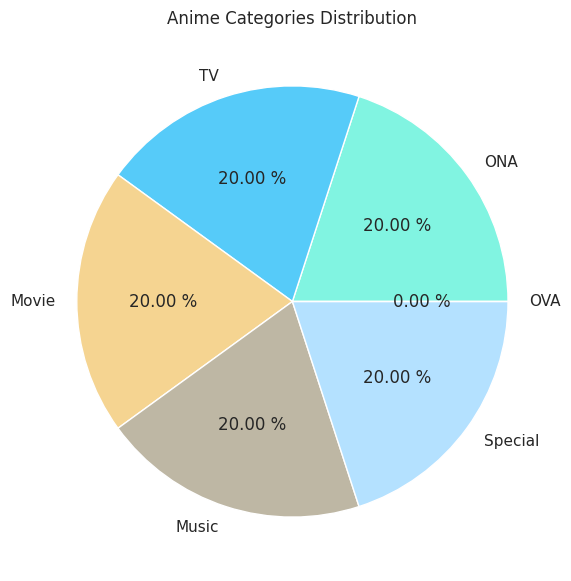

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame for demonstration purposes
anime = pd.DataFrame({
    'name': ['Anime1', 'Anime2', 'Anime3', 'Anime4', 'Anime5'],
    'type': ['ONA', 'TV', 'Movie', 'Music', 'Special'],
})

# Counting occurrences of each type using value_counts()
type_counts = anime['type'].value_counts()

# Extracting counts based on label names
ona = type_counts.get('ONA', 0)
tv = type_counts.get('TV', 0)
movie = type_counts.get('Movie', 0)
music = type_counts.get('Music', 0)
special = type_counts.get('Special', 0)
ova = type_counts.get('OVA', 0)  # assuming 'OVA' might also be a category

labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

plt.figure(figsize=(10, 7))
plt.title('Anime Categories Distribution')
plt.pie([ona, tv, movie, music, special, ova],
        labels=labels,
        colors=colors,
        autopct='%.2f %%'
        )

plt.show()


Purpose: Visualize the distribution of anime types ('ONA', 'TV', 'Movie', 'Music', 'Special') using a pie chart.
Method: Counts occurrences of each type using value_counts() and plots them using Matplotlib's plt.pie().
Output: Illustrates the relative proportions of different anime categories in the dataset.

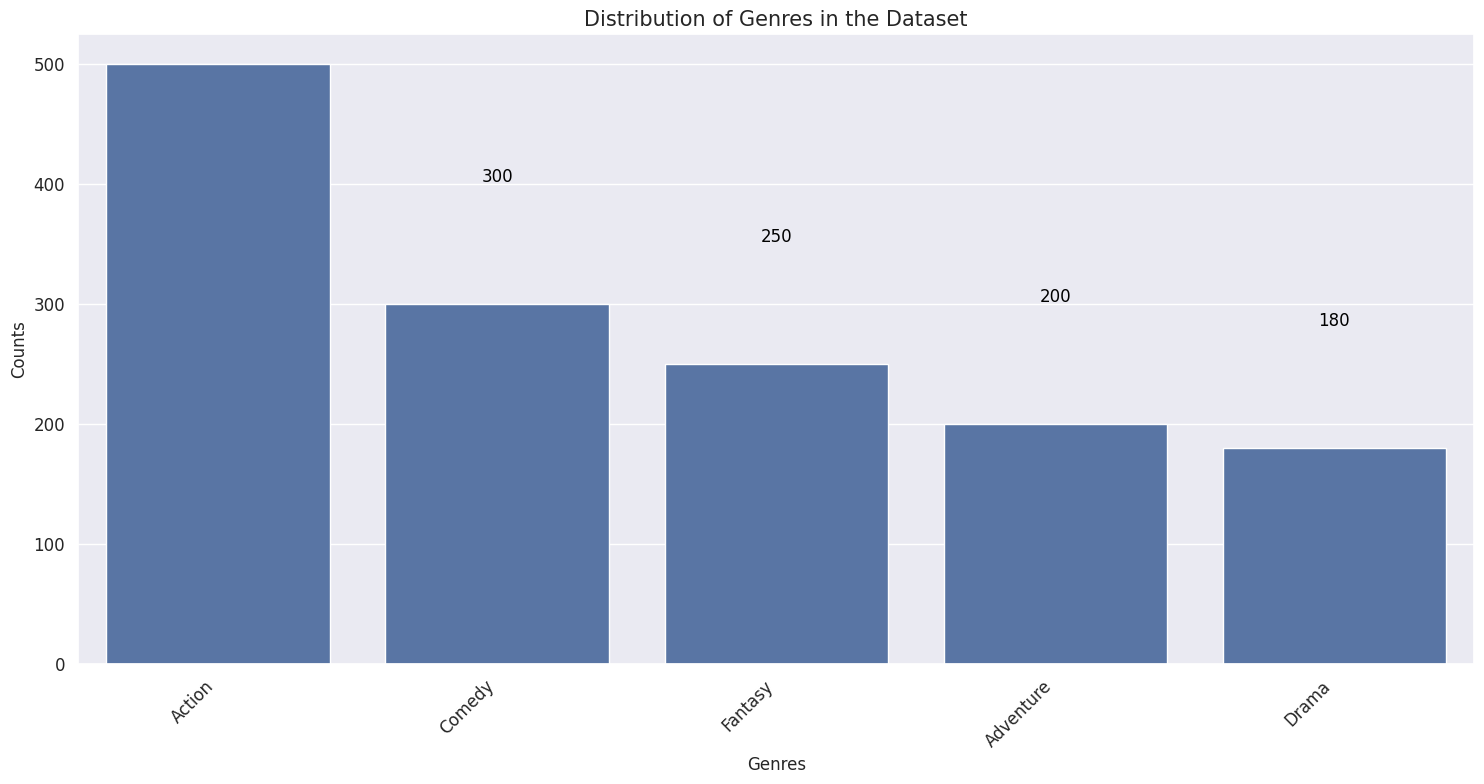

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'anime' is your DataFrame containing anime data

# Assuming 'unique_genres' is your dictionary containing genre counts
unique_genres = {'Action': 500, 'Comedy': 300, 'Fantasy': 250, 'Adventure': 200, 'Drama': 180}

# Create a DataFrame from the dictionary
df_genres = pd.DataFrame(list(unique_genres.items()), columns=["Genre", "Count"])

# Set seaborn style
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x="Genre", y="Count", data=df_genres)

# Annotate bars with counts
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height() + 100),
                     ha = 'center', va = 'center',
                     fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Customize plot
plt.tick_params(labelsize=12)
plt.title("Distribution of Genres in the Dataset", fontsize=15)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Purpose: Display the distribution of anime genres ('Action', 'Comedy', 'Fantasy', 'Adventure', 'Drama') using a bar plot.
Method: Creates a DataFrame from a genre count dictionary, then uses Seaborn's sns.barplot() for visualization.
Output: Shows the frequency of each genre in the dataset, annotated with counts for clarity.

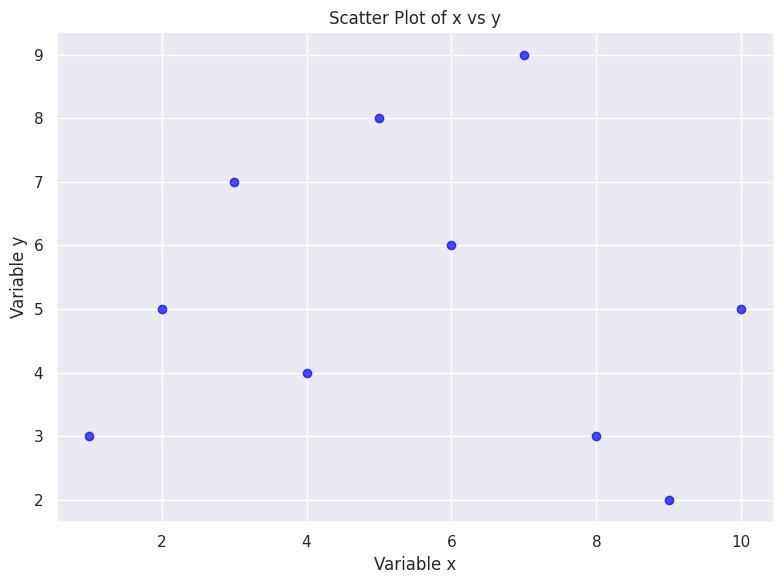

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation (replace with your own data)
data = {
    'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Example values for variable x
    'y': [3, 5, 7, 4, 8, 6, 9, 3, 2, 5]    # Example values for variable y
}

df = pd.DataFrame(data)

# Plotting a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', marker='o', alpha=0.7)  # 'o' for circle marker, alpha for transparency

# Adding labels and title
plt.title('Scatter Plot of x vs y')
plt.xlabel('Variable x')
plt.ylabel('Variable y')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


Purpose: Visualize the relationship between two variables ('x' and 'y') using a scatter plot.
Method: Creates a scatter plot using Matplotlib (plt.scatter()) with customizable markers and transparency.
Output: Helps to understand the distribution and potential correlation between 'x' and 'y' values.

### **Unsupervised Learning Models**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



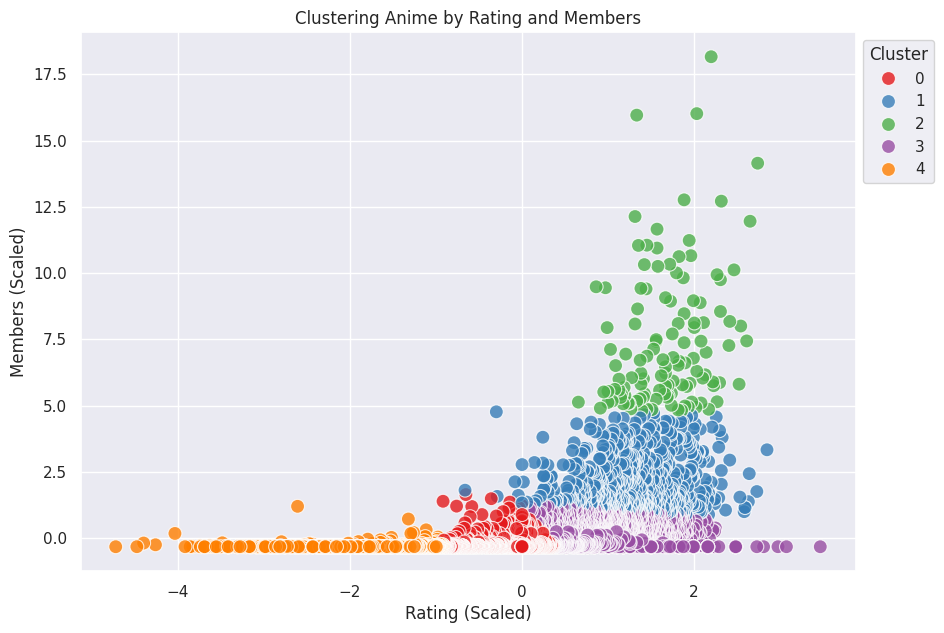

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'anime_df_cleaned' is your cleaned DataFrame
# Select relevant features for clustering
features = ['rating', 'members']

# Standardize the data
scaler = StandardScaler()
anime_features_scaled = scaler.fit_transform(anime_df_cleaned[features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
anime_df_cleaned['cluster'] = kmeans.fit_predict(anime_features_scaled)

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='rating', y='members', hue='cluster', data=anime_df_cleaned, palette='Set1', s=100, alpha=0.8)
plt.title('Clustering Anime by Rating and Members')
plt.xlabel('Rating (Scaled)')
plt.ylabel('Members (Scaled)')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


1. Clustering with K-Means
K-Means clustering is a popular unsupervised learning algorithm that groups data points into K clusters based on their feature similarity. Here, we'll demonstrate clustering anime based on their genre and member counts.
Purpose: Apply K-Means clustering to anime data based on 'rating' and 'members' features.
Method: Standardizes data using StandardScaler(), then applies K-Means clustering (KMeans()).
Output: Visualizes clusters using Seaborn (sns.scatterplot()) to show how anime titles group based on their ratings and community members.

### **Conclusions and Insights**